In [1]:
# Setup
%matplotlib inline
from sympy import *
import numpy as np
import matplotlib.pyplot as pp

init_printing()

In [2]:
# Define all measured variables and their uncertainties

R = (0.276, 0.01*0.276)    # rim radius

D_L = (35.25, 0.01*35.25)  # optical lever distance
H_L = (2.55, 0.01*2.55)    # optical lever height
Y_0 = (12.00, 0.01*12.00)  # optical grid initial height

Y = (-2.00, 0.05)          # y-position of laser spot
P = (33.734, 0.01*35.183)  # load
U = (10.236, 0.001*25.4)   # deflection

In [3]:
# Define functions for derived quantities

def phi(y, d_l, h_l, y_0):
    return -0.5*(np.arctan((y_0 - h_l + y)/d_l) -
                 np.arctan((y_0 - h_l + 0.4)/d_l))

def f_alpha(p, u):
    return p/(u/1000)

def f_beta(phi, u):
    return phi/(u/1000)

def f_mu(r, beta):
    return ((8*np.pi - 24)*r*beta+2-np.pi)/((2-np.pi)*(4*r*beta-1))

def f_EI(r, alpha, mu):
    return r**3*alpha/(2*mu)*((np.pi-2)*mu + 2*np.pi - 6)

def f_GJ(r, alpha, mu):
    return r**3*alpha/2*((np.pi-2)*mu + 2*np.pi - 6)

In [4]:
# Monte Carlo simulation
N_samp = 10000

# Assume normal distributions for all quantities
R_mc = R[0] + R[1]*np.random.randn(N_samp)

D_L_mc = D_L[0] + D_L[1]*np.random.randn(N_samp)
H_L_mc = H_L[0] + H_L[1]*np.random.randn(N_samp)
Y_0_mc = Y_0[0] + Y_0[1]*np.random.randn(N_samp)

Y_mc = Y[0] + Y[1]*np.random.randn(N_samp)
P_mc = P[0] + P[1]*np.random.randn(N_samp)
U_mc = U[0] + U[1]*np.random.randn(N_samp)

# Calculate derived quantities
PHI = phi(Y_mc, D_L_mc, H_L_mc, Y_0_mc)
ALPHA = f_alpha(P_mc, U_mc)
BETA = f_beta(PHI, U_mc)

MU = f_mu(R_mc, BETA)
EI = f_EI(R_mc, ALPHA, MU)
GJ = f_GJ(R_mc, ALPHA, MU)

0.057669658088 0.0107452971735


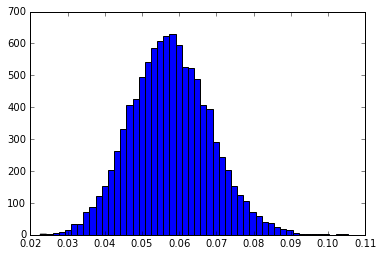

In [5]:
print np.mean(MU), np.std(MU)
x = pp.hist(MU, 50)

216.659615283 0.0107452971735


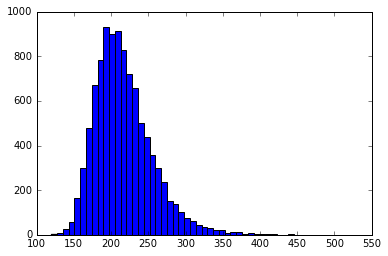

In [6]:
print np.mean(EI), np.std(MU)
y = pp.hist(EI, 50)

12.0998771616 0.454117385596 3.75307434556


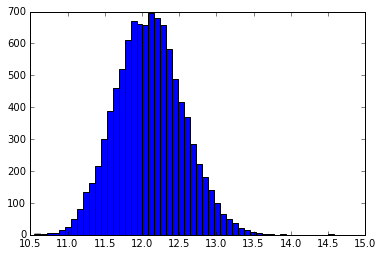

In [7]:
print np.mean(GJ), np.std(GJ), 100 * np.std(GJ) / np.mean(GJ)
y = pp.hist(GJ, 50)

In [8]:
s = '{:s}  {:.4e}  {:.4e}  {:>5.1f}'
print '    {:10s}  {:10s}  {:10s}'.format('MEAN', 'STD', '% ERR')

print s.format('MU', np.mean(MU), np.std(MU), 100 * np.std(MU) / np.mean(MU))
print s.format('EI', np.mean(EI), np.std(EI), 100 * np.std(EI) / np.mean(EI))
print s.format('GJ', np.mean(GJ), np.std(GJ), 100 * np.std(GJ) / np.mean(GJ))

    MEAN        STD         % ERR     
MU  5.7670e-02  1.0745e-02   18.6
EI  2.1666e+02  3.8796e+01   17.9
GJ  1.2100e+01  4.5412e-01    3.8
